In [699]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn

import logging

In [700]:
data = pd.read_csv('Bank_data.csv')
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L
0,13.0,14,14.0,15.00,29.0,-89.0,85.0,NaN,1,10,20.00,0
1,14.0,19,14.0,11.00,53.0,9.0,93.0,NaN,9,NaN,17.00,1
2,14.0,10,13.0,103.33,9.0,9.0,74.0,NaN,Current,PA,38.00,0
3,59.0,12,59.0,13.33,12.0,9.0,25.0,80,30 Days PD,46,28.05,0
4,59.0,17,59.0,NaN,9.0,9.0,67.0,NaN,0,NaN,30.00,0


In [701]:
data.shape

(2500, 12)

In [702]:
data = data.drop('H', axis = 1)
data = data.drop('I', axis = 1)
data = data.drop('J', axis = 1)

In [703]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       2496 non-null   float64
 1   B       2500 non-null   int64  
 2   C       2496 non-null   float64
 3   D       2386 non-null   float64
 4   E       2289 non-null   float64
 5   F       2497 non-null   float64
 6   G       2497 non-null   float64
 7   K       2498 non-null   float64
 8   L       2500 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 175.9 KB


In [704]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
A,2496.0,27.227564,20.143978,9.0,14.00,14.0,59.0,59.00
B,2500.0,14.315200,2.651539,10.0,13.00,14.0,16.0,19.00
C,2496.0,26.760016,20.203804,9.0,14.00,14.0,59.0,59.00
D,2386.0,38.678005,32.459272,9.0,16.67,31.0,48.0,486.00
E,2289.0,46.589777,38.866938,9.0,9.00,35.0,85.0,109.00
F,2497.0,7.629555,35.660011,-90.0,9.00,9.0,9.0,109.00
G,2497.0,49.672807,27.786025,9.0,25.00,48.0,72.0,109.00
K,2498.0,23.531165,7.867665,13.1,17.00,20.0,30.0,86.12
L,2500.0,0.171600,0.377108,0.0,0.00,0.0,0.0,1.00


In [705]:
print(data.isnull().sum())

A      4
B      0
C      4
D    114
E    211
F      3
G      3
K      2
L      0
dtype: int64


In [706]:
from scipy.stats import skew

A
nan


C:\Users\tenu0.LABRINTH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


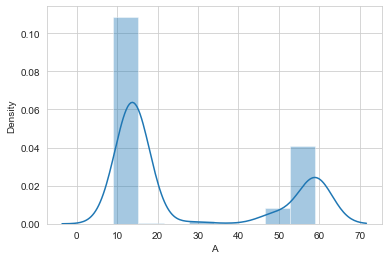

B
0.2419610815108176


C:\Users\tenu0.LABRINTH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


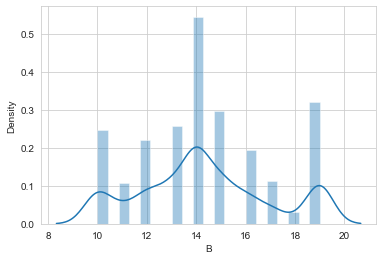

C
nan


C:\Users\tenu0.LABRINTH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


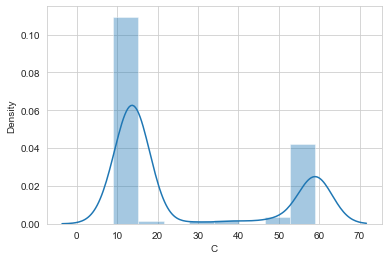

D
nan


C:\Users\tenu0.LABRINTH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


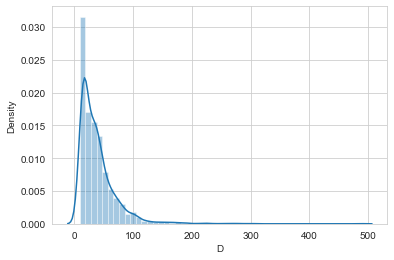

E
nan


C:\Users\tenu0.LABRINTH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


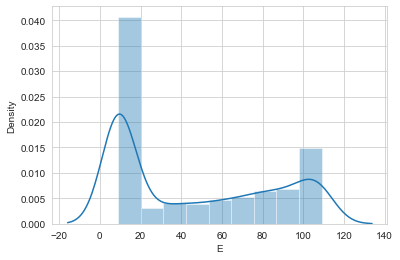

F
nan


C:\Users\tenu0.LABRINTH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


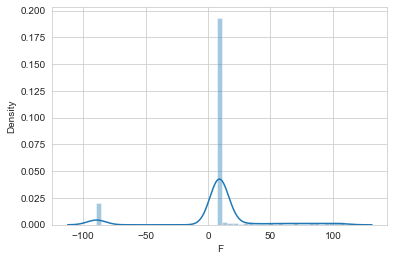

G
nan


C:\Users\tenu0.LABRINTH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


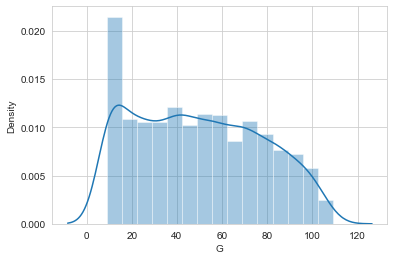

K
nan


C:\Users\tenu0.LABRINTH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


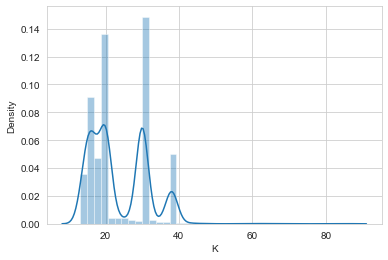

L
1.7420252964977665


C:\Users\tenu0.LABRINTH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


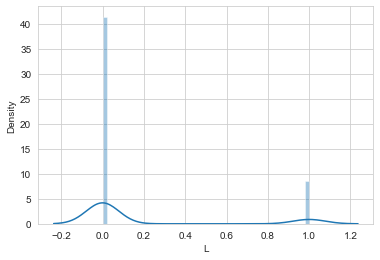

In [707]:
for col in data:
    print(col)
    print(skew(data[col]))

    plt.figure()
    sns.distplot(data[col])
    plt.show()

<AxesSubplot:>

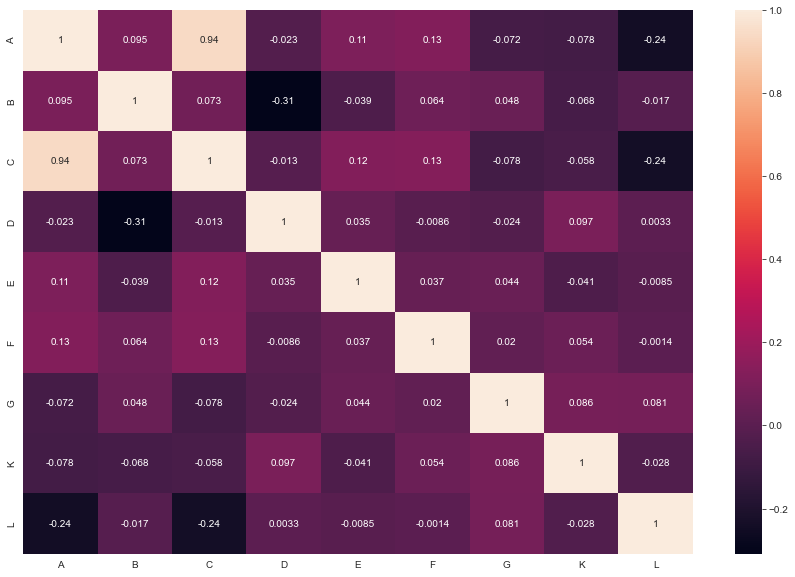

In [708]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot = True)

In [709]:
data["D"] = np.sqrt(data["D"])
data["C"] = np.sqrt(data["C"])
data["A"] = np.sqrt(data["A"])

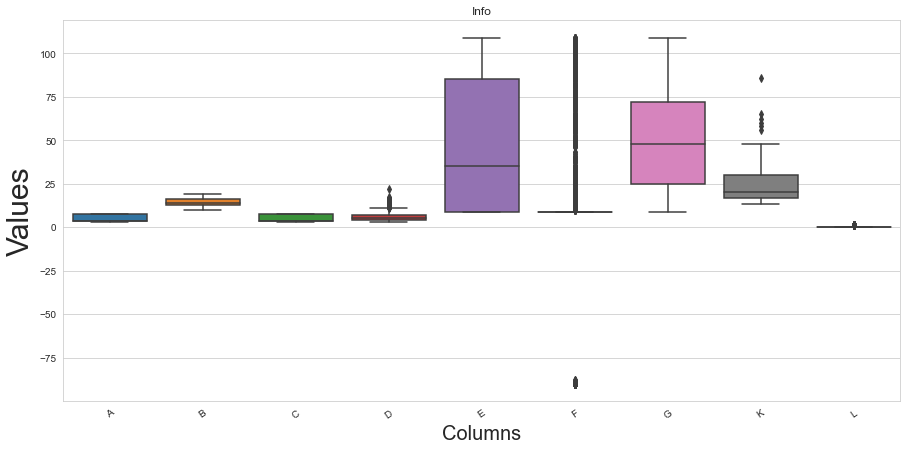

In [710]:
plt.figure(figsize=(15,7))
chart=sns.boxplot(data=data)
chart.set_xticklabels(chart.get_xticklabels(),rotation=35)
plt.title("Info")
plt.ylabel("Values",size=30)
plt.xlabel("Columns",size=20);

In [711]:
data_o = data.copy()
col = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'K']
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

A     3.939488
B     3.000000
C     3.939488
D     2.845312
E    76.000000
F     0.000000
G    47.000000
K    13.000000
dtype: float64


In [712]:
data_o = data_o[~((data_o < (Q1 - 1.5 * IQR)) |(data_o > (Q3 + 1.5 * IQR))).any(axis=1)]
data_o.shape

C:\Users\tenu0.LABRINTH\AppData\Local\Temp\ipykernel_23132\518416359.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_o = data_o[~((data_o < (Q1 - 1.5 * IQR)) |(data_o > (Q3 + 1.5 * IQR))).any(axis=1)]
C:\Users\tenu0.LABRINTH\AppData\Local\Temp\ipykernel_23132\518416359.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_o = data_o[~((data_o < (Q1 - 1.5 * IQR)) |(data_o > (Q3 + 1.5 * IQR))).any(axis=1)]


(1895, 9)

Visualization

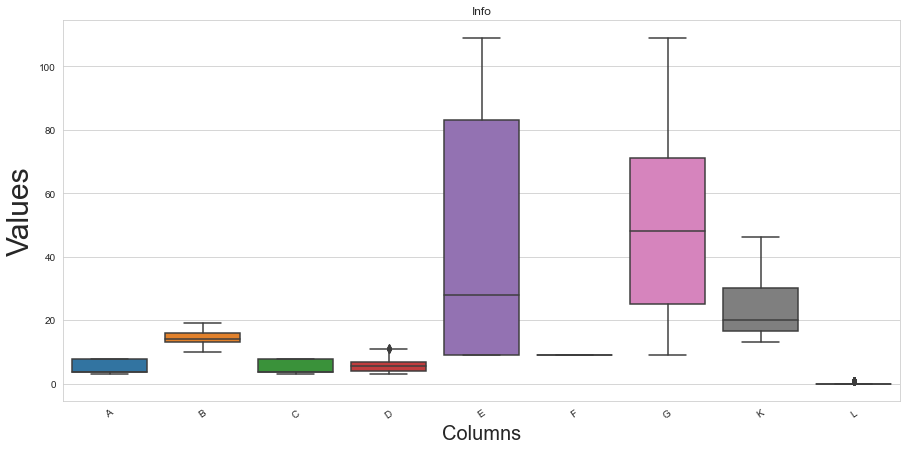

In [713]:
plt.figure(figsize=(15,7))
chart=sns.boxplot(data=data_o)
chart.set_xticklabels(chart.get_xticklabels(),rotation=35)
plt.title("Info")
plt.ylabel("Values",size=30)
plt.xlabel("Columns",size=20);

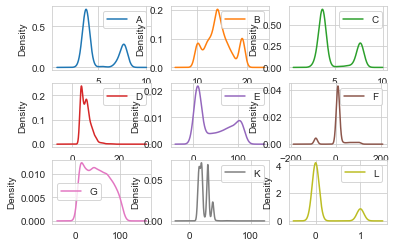

In [714]:
from matplotlib import pyplot

data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

In [715]:
print(data_o.isnull().sum())

A      4
B      0
C      4
D    100
E    203
F      3
G      3
K      2
L      0
dtype: int64


Filling Null Values


In [716]:
data_o["A"].fillna(data_o["A"].median(),inplace=True)
data_o["C"].fillna(data_o["C"].median(),inplace=True)
data_o["D"].fillna(data_o["D"].median(),inplace=True)
data_o["E"].fillna(data_o["E"].median(),inplace=True)
data_o["F"].fillna(data_o["F"].median(),inplace=True)
data_o["G"].fillna(data_o["G"].median(),inplace=True)
data_o["K"].fillna(data_o["K"].median(),inplace=True)

In [717]:
print(data_o.isnull().sum())

A    0
B    0
C    0
D    0
E    0
F    0
G    0
K    0
L    0
dtype: int64


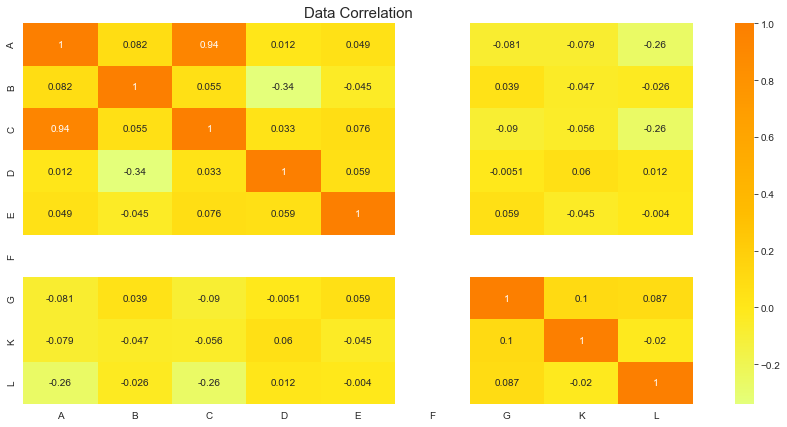

In [718]:
plt.figure(figsize=(15, 7))
sns.heatmap(data_o.corr(), annot=True, cmap="Wistia")
plt.title("Data Correlation", size=15)
plt.show()

In [719]:
data_o.drop("F", axis = 1, inplace=True)
data_o.drop("C", axis = 1, inplace=True)

C:\Users\tenu0.LABRINTH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='L', ylabel='Density'>

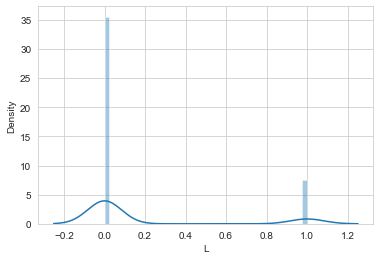

In [720]:
sns.distplot(data_o['L'])

Pre-Processing

In [721]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scalar = StandardScaler()

In [722]:
data.reset_index(drop=True)

,A,B,C,D,E,F,G,K,L
0,3.605551,14,3.741657,3.872983,29.0,-89.0,85.0,20.00,0
1,3.741657,19,3.741657,3.316625,53.0,9.0,93.0,17.00,1
2,3.741657,10,3.605551,10.165136,9.0,9.0,74.0,38.00,0
3,7.681146,12,7.681146,3.651027,12.0,9.0,25.0,28.05,0
4,7.681146,17,7.681146,NaN,9.0,9.0,67.0,30.00,0
...,...,...,...,...,...,...,...,...,...
2495,3.741657,13,3.000000,3.605551,9.0,9.0,38.0,30.00,0
2496,7.681146,17,6.244998,3.000000,50.0,9.0,30.0,20.00,0
2497,7.681146,19,7.681146,3.651027,NaN,9.0,66.0,14.00,0
2498,7.000000,16,7.681146,5.196152,9.0,9.0,36.0,17.00,0


In [723]:
X=data_o.iloc[:,:-1]
y=data_o.iloc[:,-1]

In [724]:
data_o["D"]=round(data_o["D"],1)
data_o["E"]=round(data_o["E"],1)
data_o["K"]=round(data_o["K"],1)

In [725]:
X_ = scalar.fit_transform(X)

In [726]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.40, random_state=42)

In [727]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 930, 1: 207}

In [728]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255

y_train_dog=np.array(y_train)
y_test_dog=np.array(y_test)

In [729]:
from sklearn.utils import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
                                        class_weight="balanced",
                                        classes=np.unique(y_test),
                                        y=y_test
                                    )
class_weights = dict(enumerate(class_weights))

In [730]:
class_weights

{0: 0.5959119496855346, 1: 3.1065573770491803}

Model

In [731]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
lr =  LogisticRegression(class_weight= class_weights)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [732]:
print("Logistic Classification:\n", classification_report(y_test,y_pred))

Logistic Classification:
               precision    recall  f1-score   support

           0       0.97      0.41      0.57       636
           1       0.23      0.93      0.37       122

    accuracy                           0.49       758
   macro avg       0.60      0.67      0.47       758
weighted avg       0.85      0.49      0.54       758



In [733]:
confusion_matrix(y_test,y_pred)

array([[258, 378],
       [  9, 113]], dtype=int64)

In [734]:
lr.coef_

array([[-0.8175753 ,  0.02296671, -0.00798323,  0.0578546 ,  0.2371207 ,
        -0.06868015]])

In [735]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [736]:
y_pred_xg = xg.predict(X_test)

In [737]:
print("XGBoost Classification:\n", classification_report(y_test,y_pred_xg))

XGBoost Classification:
               precision    recall  f1-score   support

           0       0.84      0.98      0.91       636
           1       0.38      0.05      0.09       122

    accuracy                           0.83       758
   macro avg       0.61      0.52      0.50       758
weighted avg       0.77      0.83      0.78       758



In [738]:
confusion_matrix(y_test,y_pred_xg)

array([[626,  10],
       [116,   6]], dtype=int64)

In [739]:
xg.feature_importances_

array([0.40400818, 0.1299753 , 0.11362348, 0.1264982 , 0.11278234,
       0.11311253], dtype=float32)

Text(0.5, 1.0, 'Confusion matrix')

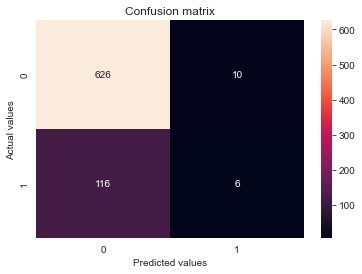

In [740]:
conf=confusion_matrix(y_test,y_pred_xg)
conf=sns.heatmap(conf,annot=True,fmt='.4g')
conf.set_xlabel("Predicted values")
conf.set_ylabel("Actual values")
conf.set_title("Confusion matrix")

In [741]:
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier

In [742]:
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=3)

In [743]:
# def get_score(model, X_train, X_test, y_train, y_test):
#     model.fit(X_train, y_train)
#     return model.score(X_test, y_test)

In [744]:
# scores_log = []
# scores_svm = []
# scores_rf = []
# scores_xgb = []
# scores_dec = []

In [745]:
# for train_index, test_index in kf.split(X, y):
#     X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
#     scores_log.append(get_score(LogisticRegression(),X_train, X_test, y_train, y_test ))
#     scores_svm.append(get_score(SVC(),X_train, X_test, y_train, y_test ))
#     scores_rf.append(get_score(RandomForestClassifier(),X_train, X_test, y_train, y_test ))
#     scores_xgb.append(get_score(XGBClassifier(),X_train, X_test, y_train, y_test ))
#     scores_dec.append(get_score(DecisionTreeClassifier(),X_train, X_test, y_train, y_test ))

In [746]:
# print("Logistic Regression Scores:\n", scores_log)
# print("SVM Scores:\n", scores_svm)
# print("Random Forest Scores:\n", scores_rf)
# print("XG Boost Scores:\n", scores_xgb)
# print("Decision tree Scores:\n", scores_dec)